<a href="https://colab.research.google.com/github/PreetiYadav99/Machine-Learning-Project/blob/main/totanic_survive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.drop(['deck', 'embark_town','alive','class', 'who', 'adult_male'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [ ]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [ ]:
df.dropna(subset=['embarked'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     889 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 63.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [ ]:
df['sex']=le.fit_transform(df['sex'])
df['embarked']=le.fit_transform(df['embarked'])

In [ ]:
df=df.astype(int)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


In [ ]:
X=df.drop('survived',axis=1)
y=df['survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [ ]:
y_test

,survived
281,0
435,1
39,1
418,0
585,1
...,...
433,0
807,0
25,1
85,1


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.8033707865168539

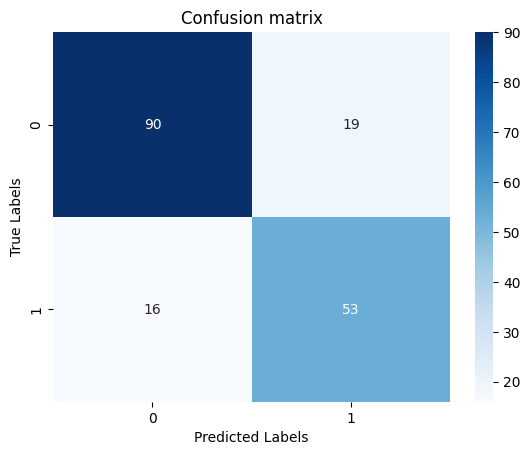

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaler=scaler.fit_transform(X_train)
X_train_scaler
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Knn_model=KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(X_train_scaler,y_train)
y_pred_knn=Knn_model.predict(X_test_scaled)


In [ ]:
y_pred_knn=Knn_model.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test,y_pred_knn)

0.7752808988764045

<Axes: >

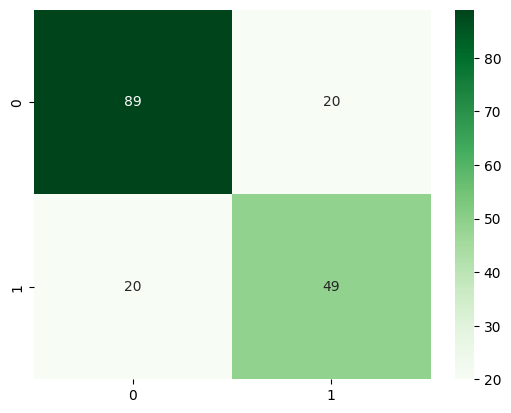

In [ ]:
kcm=confusion_matrix(y_test,y_pred_knn)
kcm
sns.heatmap(kcm,annot=True,fmt='d',cmap='Greens')

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.71      0.71      0.71        69

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178



In [ ]:
# Naive Bayes

In [ ]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,alone
708,1,0,22,0,0,151,2,1
240,3,0,29,1,0,14,0,0
382,3,1,32,0,0,7,2,1
792,3,0,29,8,2,69,2,0
683,3,1,14,5,2,46,2,0
...,...,...,...,...,...,...,...,...
107,3,1,29,0,0,7,2,1
271,3,1,25,0,0,0,2,1
862,1,0,48,0,0,25,2,1
436,3,0,21,2,2,34,2,0


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB=GaussianNB()

In [ ]:
model_NB

GaussianNB()

In [ ]:
model_NB.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_NB=model_NB.predict(X_test)

In [ ]:
y_pred_NB

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [ ]:
y_test

,survived
281,0
435,1
39,1
418,0
585,1
...,...
433,0
807,0
25,1
85,1


In [ ]:
accuracy_score(y_test,y_pred_NB)

0.7752808988764045

In [ ]:
X_test

,pclass,sex,age,sibsp,parch,fare,embarked,alone
281,3,1,28,0,0,7,2,1
435,1,0,14,1,2,120,2,0
39,3,0,14,1,0,11,0,0
418,2,1,30,0,0,13,2,1
585,1,0,18,0,2,79,2,0
...,...,...,...,...,...,...,...,...
433,3,1,17,0,0,7,2,1
807,3,0,18,0,0,7,2,1
25,3,0,38,1,5,31,2,0
85,3,0,33,3,0,15,2,0


In [ ]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,alone
708,1,0,22,0,0,151,2,1
240,3,0,29,1,0,14,0,0
382,3,1,32,0,0,7,2,1
792,3,0,29,8,2,69,2,0
683,3,1,14,5,2,46,2,0
...,...,...,...,...,...,...,...,...
107,3,1,29,0,0,7,2,1
271,3,1,25,0,0,0,2,1
862,1,0,48,0,0,25,2,1
436,3,0,21,2,2,34,2,0


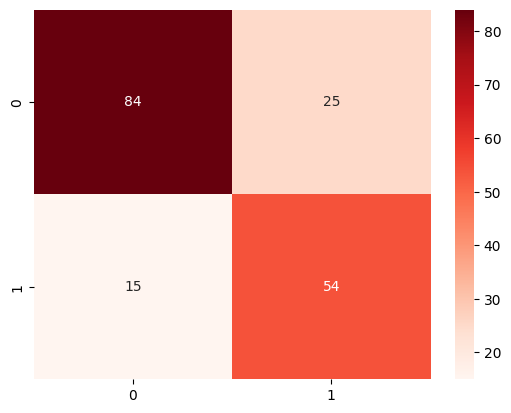

In [ ]:
nbcm=confusion_matrix(y_test,y_pred_NB)
nbcm
sns.heatmap(nbcm,annot=True, fmt='d', cmap='Reds')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



In [ ]:
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DT=DecisionTreeClassifier(random_state=42)

In [ ]:
model_DT.fit(X_train_scaler,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_DT=model_DT.predict(X_test_scaled)

In [ ]:
y_pred_DT

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0])

In [ ]:
accuracy_score(y_test,y_pred_DT)

0.7696629213483146

<Axes: >

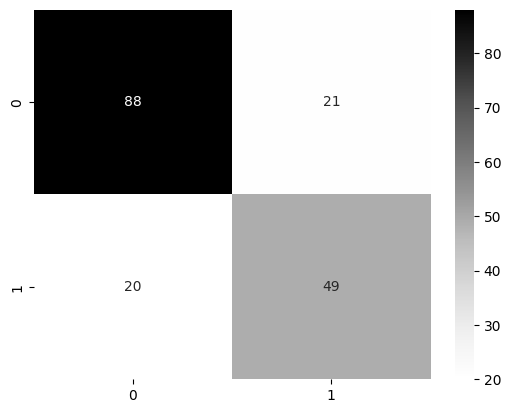

In [ ]:
dtcm=confusion_matrix(y_test,y_pred_DT)
sns.heatmap(dtcm,annot=True,fmt='d',cmap='Greys')

In [ ]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.70      0.71      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm=SVC(kernel='rbf')

In [ ]:
model_svm.fit(X_train_scaler,y_train)

SVC()

In [ ]:
y_pred_svm=model_svm.predict(X_test_scaled)
y_pred_svm

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [ ]:
accuracy_score(y_test,y_pred_svm)

0.8258426966292135

<Axes: >

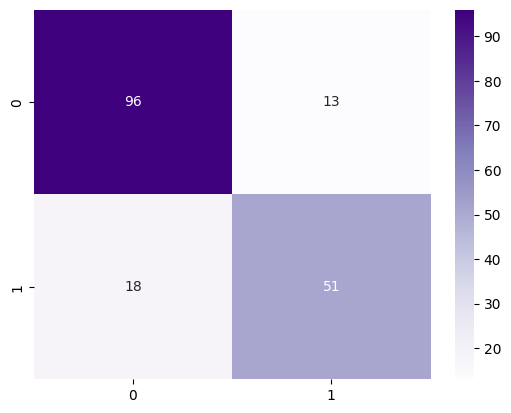

In [ ]:
svmcm=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(svmcm,annot=True,fmt='d',cmap='Purples')

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.80      0.74      0.77        69

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178



In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,2,1
887,1,1,0,19,0,0,30,2,1
888,0,3,0,29,1,2,23,2,0
889,1,1,1,26,0,0,30,0,1


In [ ]:
X=df.drop('survived', axis=1)
y=df['survived']

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
scores=cross_val_score(model_svm, X_scaled,y, cv=5, scoring='accuracy')

In [ ]:
print(scores)

[0.83146067 0.82022472 0.81460674 0.80898876 0.86440678]


In [ ]:
print(scores.mean())

0.8279375357074844
